In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from statsmodels.tsa.stattools import acf, pacf

In [36]:
symbol_list = ['ETH-USD', 'BTC-USD', '^VIX', '^SOX']
start_date = '2015-01-01'
end_date = '2022-12-31'
interval = '1d'

data = yf.download(symbol_list, start=start_date, end=end_date, interval=interval, auto_adjust=True)
data = data.fillna(method='ffill')
data

[*********************100%%**********************]  4 of 4 completed
C:\Users\LiaoYF\AppData\Local\Temp\ipykernel_512\1556962948.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


Price              Close                                               High  \
Ticker           BTC-USD      ETH-USD         ^SOX       ^VIX       BTC-USD   
Date                                                                          
2015-01-01    314.248993          NaN          NaN        NaN    320.434998   
2015-01-02    315.032013          NaN   686.729980  17.790001    315.838989   
2015-01-03    281.082001          NaN   686.729980  17.790001    315.149994   
2015-01-04    264.195007          NaN   686.729980  17.790001    287.230011   
2015-01-05    274.473999          NaN   673.590027  19.920000    278.341003   
...                  ...          ...          ...        ...           ...   
2022-12-26  16919.804688  1226.974365  2535.489990  20.870001  16920.123047   
2022-12-27  16717.173828  1212.791626  2490.169922  21.650000  16959.845703   
2022-12-28  16552.572266  1189.986084  2453.489990  22.139999  16768.169922   
2022-12-29  16642.341797  1201.595337  2534.949951  21.440001  16651.755859   
2022-12-30  16602.585938  1199.232788  2532.110107  21.670000  16643.427734   

Price                                                     Low               \
Ticker          ETH-USD         ^SOX       ^VIX       BTC-USD      ETH-USD   
Date                                                                         
2015-01-01          NaN          NaN        NaN    314.002991          NaN   
2015-01-02          NaN   694.030029  20.139999    313.565002          NaN   
2015-01-03          NaN   694.030029  20.139999    281.082001          NaN   
2015-01-04          NaN   694.030029  20.139999    257.612000          NaN   
2015-01-05          NaN   684.840027  21.290001    265.084015          NaN   
...                 ...          ...        ...           ...          ...   
2022-12-26  1226.974365  2536.820068  22.639999  16812.369141  1214.335938   
2022-12-27  1230.418091  2518.840088  22.799999  16642.072266  1205.895630   
2022-12-28  1213.128906  2504.439941  22.260000  16497.556641  1185.702148   
2022-12-29  1204.141602  2543.229980  22.309999  16508.683594  1188.360229   
2022-12-30  1202.034668  2533.979980  22.400000  16408.474609  1187.462524   

Price                                       Open                            \
Ticker             ^SOX       ^VIX       BTC-USD      ETH-USD         ^SOX   
Date                                                                         
2015-01-01          NaN        NaN    320.434998          NaN          NaN   
2015-01-02   680.280029  17.049999    314.079010          NaN   690.280029   
2015-01-03   680.280029  17.049999    314.846008          NaN   690.280029   
2015-01-04   680.280029  17.049999    281.145996          NaN   690.280029   
2015-01-05   673.429993  19.190001    265.084015          NaN   683.570007   
...                 ...        ...           ...          ...          ...   
2022-12-26  2490.760010  20.780001  16842.250000  1218.920166  2513.389893   
2022-12-27  2482.239990  21.590000  16919.291016  1226.987061  2515.820068   
2022-12-28  2445.199951  20.959999  16716.400391  1212.736572  2474.639893   
2022-12-29  2485.020020  21.360001  16552.322266  1190.010132  2493.510010   
2022-12-30  2479.020020  21.590000  16641.330078  1201.569580  2492.729980   

Price                       Volume                          
Ticker           ^VIX      BTC-USD       ETH-USD ^SOX ^VIX  
Date                                                        
2015-01-01        NaN      8036550           NaN  NaN  NaN  
2015-01-02  17.760000      7860650           NaN  0.0  0.0  
2015-01-03  17.760000     33054400           NaN  0.0  0.0  
2015-01-04  17.760000     55629100           NaN  0.0  0.0  
2015-01-05  19.190001     43962800           NaN  0.0  0.0  
...               ...          ...           ...  ...  ...  
2022-12-26  22.170000  11886957804  3.282098e+09  0.0  0.0  
2022-12-27  21.670000  15748580239  4.091531e+09  0.0  0.0  
2022-12-28  21.469999  17005713920  

In [37]:
# add a new column under 'Close' called '^VIX^2' which is the square of the '^VIX' column
col_name_list = ['Close', 'High', 'Low', 'Open', 'Volume']

def add_vix_squared(data, col_name_list):
    for col_name in col_name_list:
            data[col_name, '^VIX^2'] = data[col_name]['^VIX']**2
    data = data.sort_index(axis=1)
    return data

data = add_vix_squared(data, col_name_list)
data

Price              Close                                                   \
Ticker           BTC-USD      ETH-USD         ^SOX       ^VIX      ^VIX^2   
Date                                                                        
2015-01-01    314.248993          NaN          NaN        NaN         NaN   
2015-01-02    315.032013          NaN   686.729980  17.790001  316.484133   
2015-01-03    281.082001          NaN   686.729980  17.790001  316.484133   
2015-01-04    264.195007          NaN   686.729980  17.790001  316.484133   
2015-01-05    274.473999          NaN   673.590027  19.920000  396.806403   
...                  ...          ...          ...        ...         ...   
2022-12-26  16919.804688  1226.974365  2535.489990  20.870001  435.556935   
2022-12-27  16717.173828  1212.791626  2490.169922  21.650000  468.722483   
2022-12-28  16552.572266  1189.986084  2453.489990  22.139999  490.179573   
2022-12-29  16642.341797  1201.595337  2534.949951  21.440001  459.673623   
2022-12-30  16602.585938  1199.232788  2532.110107  21.670000  469.588903   

Price               High                                                   \
Ticker           BTC-USD      ETH-USD         ^SOX       ^VIX      ^VIX^2   
Date                                                                        
2015-01-01    320.434998          NaN          NaN        NaN         NaN   
2015-01-02    315.838989          NaN   694.030029  20.139999  405.619575   
2015-01-03    315.149994          NaN   694.030029  20.139999  405.619575   
2015-01-04    287.230011          NaN   694.030029  20.139999  405.619575   
2015-01-05    278.341003          NaN   684.840027  21.290001  453.264139   
...                  ...          ...          ...        ...         ...   
2022-12-26  16920.123047  1226.974365  2536.820068  22.639999  512.569572   
2022-12-27  16959.845703  1230.418091  2518.840088  22.799999  519.839965   
2022-12-28  16768.169922  1213.128906  2504.439941  22.260000  495.507610   
2022-12-29  16651.755859  1204.141602  2543.229980  22.309999  497.736076   
2022-12-30  16643.427734  1202.034668  2533.979980  22.400000  501.759983   

Price       ...          Open                                       \
Ticker      ...       BTC-USD      ETH-USD         ^SOX       ^VIX   
Date        ...                                                      
2015-01-01  ...    320.434998          NaN          NaN        NaN   
2015-01-02  ...    314.079010          NaN   690.280029  17.760000   
2015-01-03  ...    314.846008          NaN   690.280029  17.760000   
2015-01-04  ...    281.145996          NaN   690.280029  17.760000   
2015-01-05  ...    265.084015          NaN   683.570007  19.190001   
...         ...           ...          ...          ...        ...   
2022-12-26  ...  16842.250000  1218.920166  2513.389893  22.170000   
2022-12-27  ...  16919.291016  1226.987061  2515.820068  21.670000   
2022-12-28  ...  16716.400391  1212.736572  2474.639893  21.469999   
2022-12-29  ...  16552.322266  1190.010132  2493.510010  22.250000   
2022-12-30  ...  16641.330078  1201.569580  2492.729980  21.830000   

Price                        Volume                                 
Ticker          ^VIX^2      BTC-USD       ETH-USD ^SOX ^VIX ^VIX^2  
Date                                                                
2015-01-01         NaN      8036550           NaN  NaN  NaN    NaN  
2015-01-02  315.417608      7860650           NaN  0.0  0.0    0.0  
2015-01-03  315.417608     33054400           NaN  0.0  0.0    0.0  
2015-01-04  315.417608     55629100           NaN  0.0  0.0    0.0  
2015-01-05  368.256120     43962800           NaN  0.0  0.0    0.0  
...                ...          ...           ...  ...  ...    ...  
2022-12-26  491.508903  11886957804  3.282098e+09  0.0  0.0    0.0  
2022-12-27  469.588903  15748580239  4.091531e+09  0.0  0.0    0.0  
2022-12-28  460.960871  17005713920  4.991670e+09  0.0  0.0    0.0  
2022-12-29  495.062500  144722374

In [167]:
# Calculating the log return
def calc_log_return(data, symbol_list):
    symbol_list.append('^VIX^2')
    for symbol in symbol_list:
        data['Log_Return', symbol] = np.log(data['Close'][symbol] / data['Close'][symbol].shift(1))
    return data

# Calculating the cumulative log return
def calc_cum_return(data, symbol_list):
    for symbol in symbol_list:
        data['Cum_Log_Return', symbol] = data['Log_Return'][symbol].cumsum()
    return data

data = calc_log_return(data, symbol_list)
data = calc_cum_return(data, symbol_list)
data[['Close', 'Log_Return', 'Cum_Log_Return']]

Price              Close                                                   \
Ticker           BTC-USD      ETH-USD         ^SOX       ^VIX      ^VIX^2   
Date                                                                        
2015-01-01    314.248993          NaN          NaN        NaN         NaN   
2015-01-02    315.032013          NaN   686.729980  17.790001  316.484133   
2015-01-03    281.082001          NaN   686.729980  17.790001  316.484133   
2015-01-04    264.195007          NaN   686.729980  17.790001  316.484133   
2015-01-05    274.473999          NaN   673.590027  19.920000  396.806403   
...                  ...          ...          ...        ...         ...   
2022-12-26  16919.804688  1226.974365  2535.489990  20.870001  435.556935   
2022-12-27  16717.173828  1212.791626  2490.169922  21.650000  468.722483   
2022-12-28  16552.572266  1189.986084  2453.489990  22.139999  490.179573   
2022-12-29  16642.341797  1201.595337  2534.949951  21.440001  459.673623   
2022-12-30  16602.585938  1199.232788  2532.110107  21.670000  469.588903   

Price      Log_Return                                         Cum_Log_Return  \
Ticker        ETH-USD   BTC-USD      ^VIX      ^SOX    ^VIX^2        ETH-USD   
Date                                                                           
2015-01-01        NaN       NaN       NaN       NaN       NaN            NaN   
2015-01-02        NaN  0.002489       NaN       NaN       NaN            NaN   
2015-01-03        NaN -0.114028  0.000000  0.000000  0.000000            NaN   
2015-01-04        NaN -0.061959  0.000000  0.000000  0.000000            NaN   
2015-01-05        NaN  0.038169  0.113088 -0.019320  0.226175            NaN   
...               ...       ...       ...       ...       ...            ...   
2022-12-26   0.006552  0.004610  0.000000  0.000000  0.000000       1.341227   
2022-12-27  -0.011626 -0.012048  0.036693 -0.018036  0.073385       1.329600   
2022-12-28  -0.018983 -0.009895  0.022380 -0.014839  0.044761       1.310617   
2022-12-29   0.009709  0.005409 -0.032128  0.032662 -0.064255       1.320326   
2022-12-30  -0.001968 -0.002392  0.010670 -0.001121  0.021341       1.318358   

Price                                               
Ticker       BTC-USD      ^VIX      ^SOX    ^VIX^2  
Date                                                
2015-01-01       NaN       NaN       NaN       NaN  
2015-01-02  0.002489       NaN       NaN       NaN  
2015-01-03 -0.111539  0.000000  0.000000  0.000000  
2015-01-04 -0.173498  0.000000  0.000000  0.000000  
2015-01-05 -0.135329  0.113088 -0.019320  0.226175  
...              ...       ...       ...       ...  
2022-12-26  3.986054  0.159676  1.306201  0.319352  
2022-12-27  3.974006  0.196369  1.288165  0.392738  
2022-12-28  3.964111  0.218749  1.273326  0.437499  
2022-12-29  3.969520  0.186622  1.305988  0.373244  
2022-12-30  3.967128  0.197292  1.304867  0.394585  

[2921 rows x 15 columns]

In [52]:
data[['Close', 'Log_Return', 'Cum_Log_Return']].describe()

Price          Close                                                      \
Ticker       BTC-USD      ETH-USD         ^SOX         ^VIX       ^VIX^2   
count    2921.000000  1878.000000  2920.000000  2920.000000  2920.000000   
mean    13314.473573  1129.866214  1698.083093    18.684548   409.831995   
std     16299.845904  1188.248177   947.213416     7.793617   457.907316   
min       178.102997    84.308296   559.179993     9.140000    83.539606   
25%       895.026001   211.273056   918.020020    13.157500   173.119819   
50%      7379.950195   502.186005  1370.715027    16.510000   272.580208   
75%     17429.500000  1776.031830  2494.980103    22.420000   502.656403   
max     67566.828125  4812.087402  4039.510010    82.690002  6837.636504   

Price    Log_Return                                        Cum_Log_Return  \
Ticker      ETH-USD      BTC-USD         ^VIX         ^SOX        ETH-USD   
count   1877.000000  2920.000000  2919.000000  2919.000000    1877.000000   
mean       0.000702     0.001359     0.000068     0.000447       0.648955   
std        0.051396     0.038846     0.068293     0.016468       1.147733   
min       -0.550732    -0.464730    -0.299831    -0.173119      -1.336599   
25%       -0.021790    -0.013208    -0.026903    -0.003745      -0.417952   
50%        0.000902     0.001812     0.000000     0.000000       0.449300   
75%        0.026834     0.017587     0.015179     0.006327       1.711154   
max        0.234741     0.225119     0.768245     0.105753       2.707807   

Price                                          
Ticker      BTC-USD         ^VIX         ^SOX  
count   2920.000000  2919.000000  2919.000000  
mean       2.714011    -0.019727     0.749678  
std        1.719598     0.357449     0.562662  
min       -0.567824    -0.665976    -0.205470  
25%        1.047636    -0.301835     0.290360  
50%        3.157544    -0.075276     0.691260  
75%        4.017128     0.231317     1.290443  
max        5.370687     1.536462     1.771938

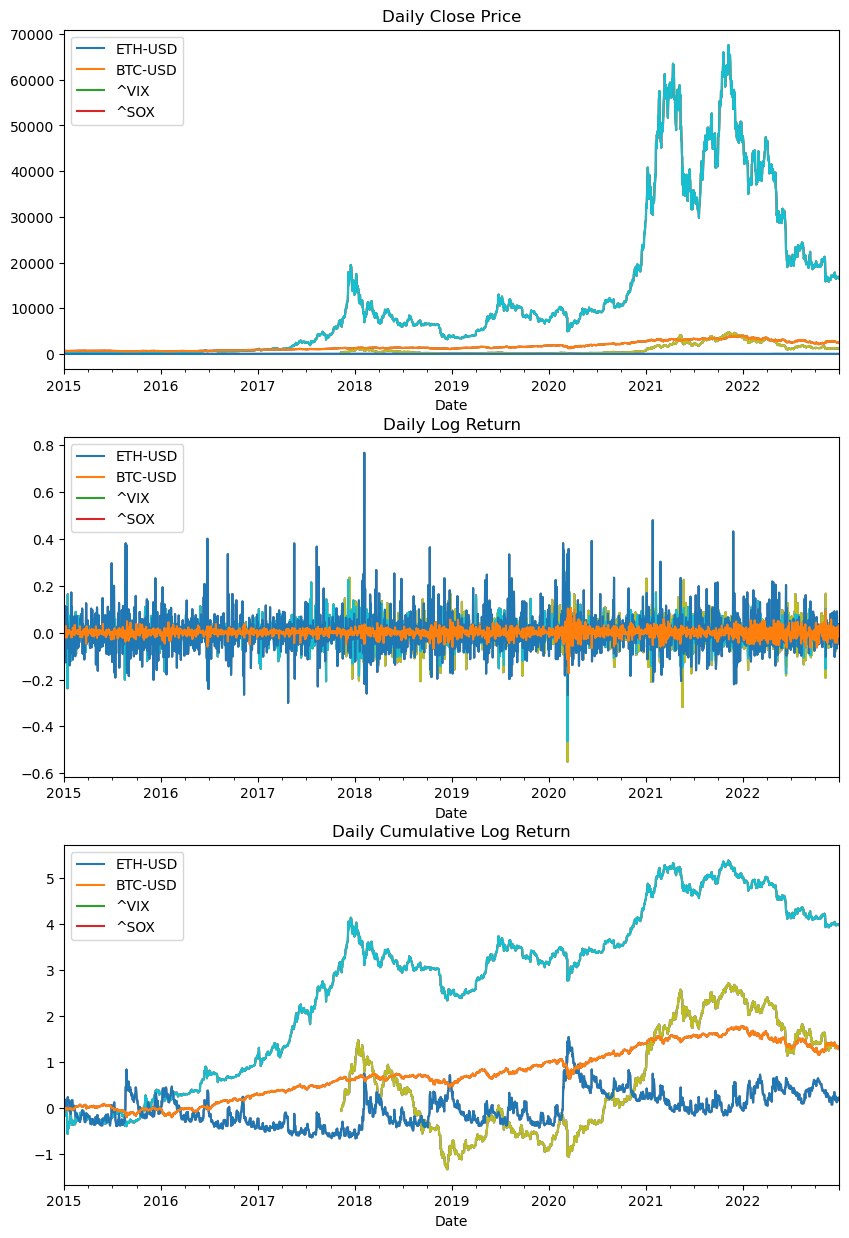

In [48]:
# Plotting Close Price, Log Return, and Cumulative Log Return in one figure
fig, ax = plt.subplots(3, 1, figsize=(10, 15))
for i in range(3):
    for symbol in symbol_list:
        data['Close'][symbol].plot(ax=ax[0], label=symbol)
        data['Log_Return'][symbol].plot(ax=ax[1], label=symbol)
        data['Cum_Log_Return'][symbol].plot(ax=ax[2], label=symbol)
    ax[i].legend(symbol_list)
    ax[i].set_title(['Daily Close Price', 'Daily Log Return', 'Daily Cumulative Log Return'][i])
plt.show()

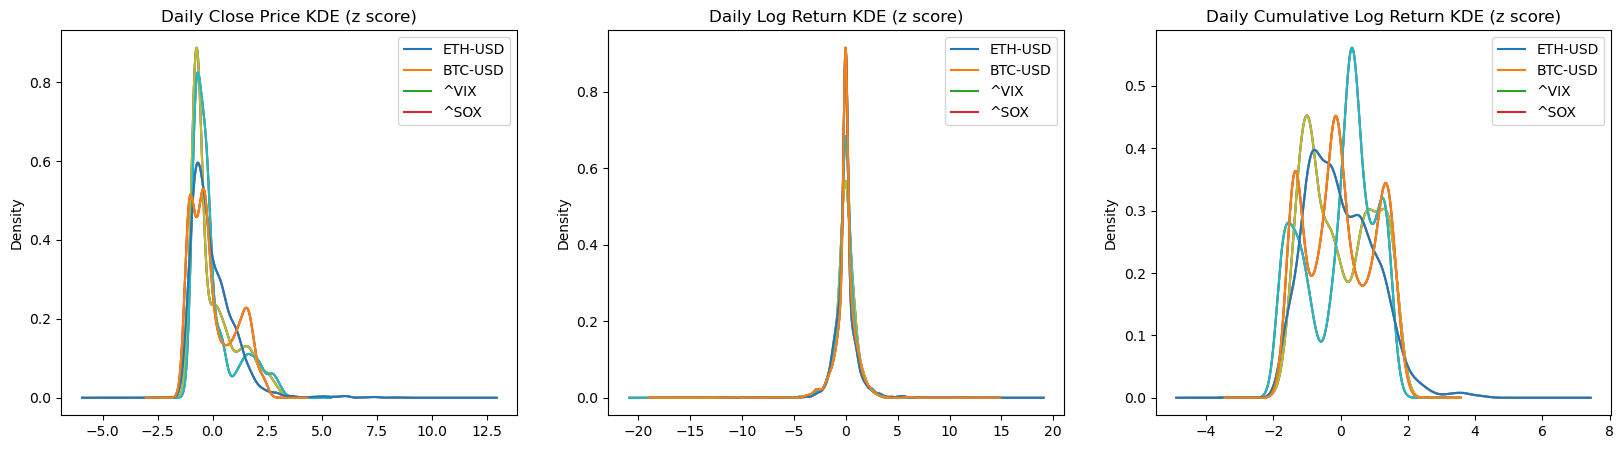

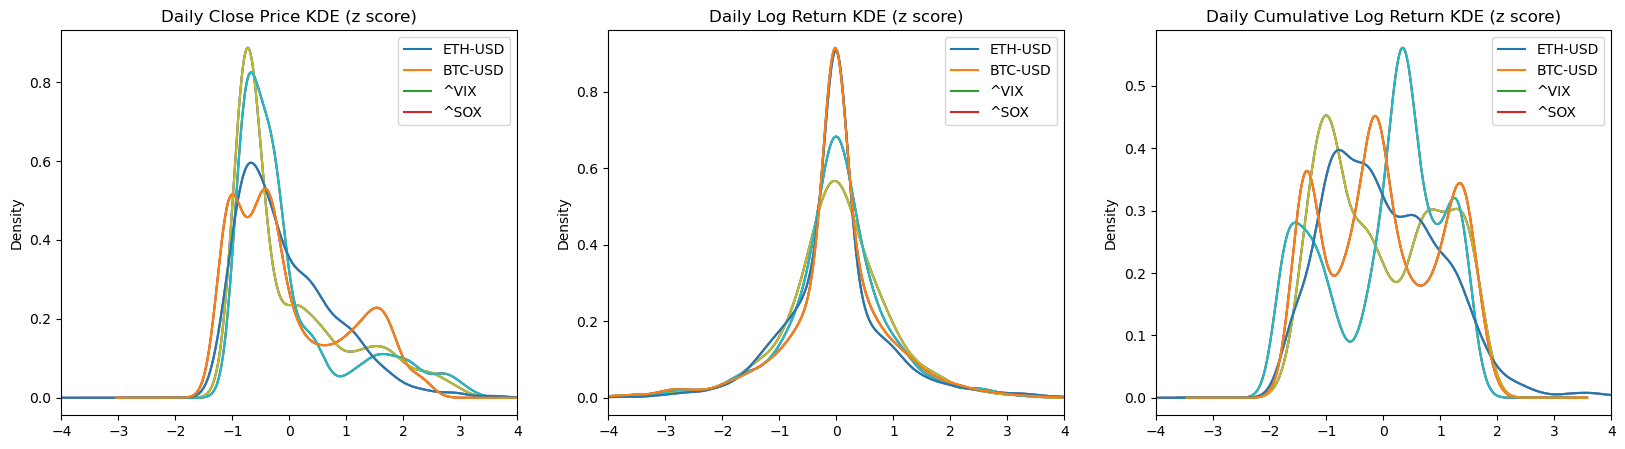

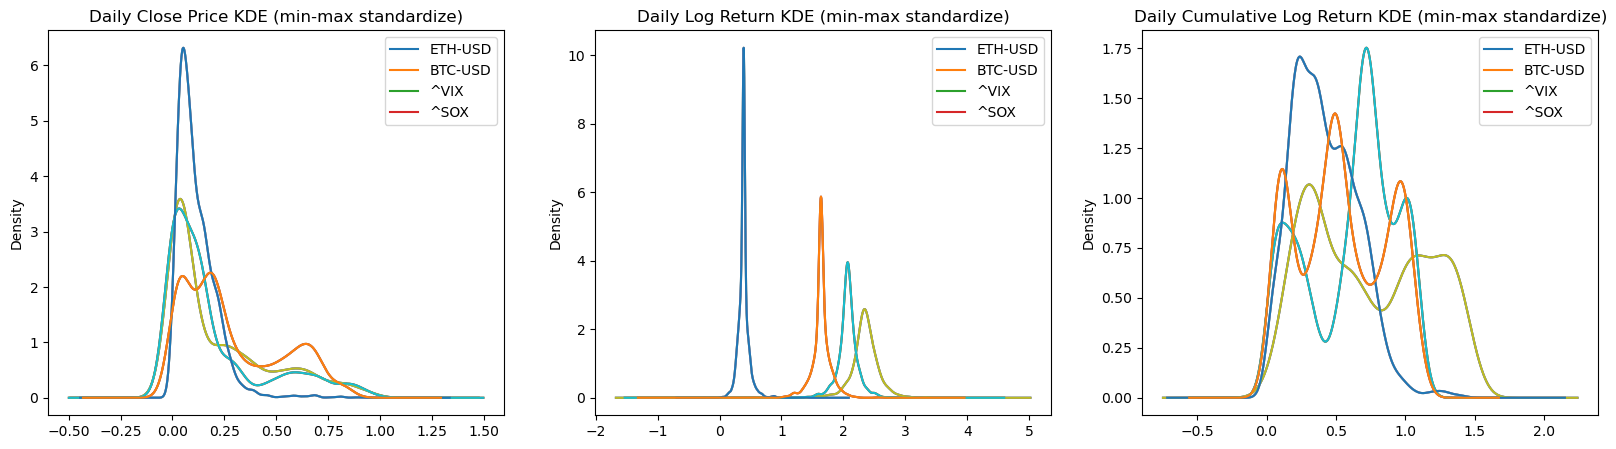

In [65]:
# Need to standardize the data for KDE
def standardize_z(series):
    return (series - series.mean())/ series.std()
def standardize_minmax(series):
    return (series - series.min())/ series.max()

# Plotting the KDE of Close Price, Log Return, and Cumulative Log Return in one figure with 3 column
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
for i in range(3):
    for symbol in symbol_list:
        standardize_z(data['Close'][symbol]).plot.kde(ax=ax[0])
        standardize_z(data['Log_Return'][symbol]).plot.kde(ax=ax[1])
        standardize_z(data['Cum_Log_Return'][symbol]).plot.kde(ax=ax[2])
    ax[i].legend(symbol_list)
    ax[i].set_title(['Daily Close Price KDE (z score)', 'Daily Log Return KDE (z score)', 'Daily Cumulative Log Return KDE (z score)'][i])
plt.show()

# Plotting the KDE of Close Price, Log Return, and Cumulative Log Return in one figure with 3 column
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
for i in range(3):
    for symbol in symbol_list:
        standardize_z(data['Close'][symbol]).plot.kde(ax=ax[0])
        standardize_z(data['Log_Return'][symbol]).plot.kde(ax=ax[1])
        standardize_z(data['Cum_Log_Return'][symbol]).plot.kde(ax=ax[2])
    # set x-axis range to be the same for all KDE plots
    ax[i].set_xlim(-4, 4)
    ax[i].legend(symbol_list)
    ax[i].set_title(['Daily Close Price KDE (z score)', 'Daily Log Return KDE (z score)', 'Daily Cumulative Log Return KDE (z score)'][i])
plt.show()

# Plotting the KDE of Close Price, Log Return, and Cumulative Log Return in one figure with 3 column
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
for i in range(3):
    for symbol in symbol_list:
        standardize_minmax(data['Close'][symbol]).plot.kde(ax=ax[0])
        standardize_minmax(data['Log_Return'][symbol]).plot.kde(ax=ax[1])
        standardize_minmax(data['Cum_Log_Return'][symbol]).plot.kde(ax=ax[2])
    # set x-axis range to be the same for all KDE plots
    ax[i].legend(symbol_list)
    ax[i].set_title(['Daily Close Price KDE (min-max standardize)', 'Daily Log Return KDE (min-max standardize)', 'Daily Cumulative Log Return KDE (min-max standardize)'][i])
plt.show()

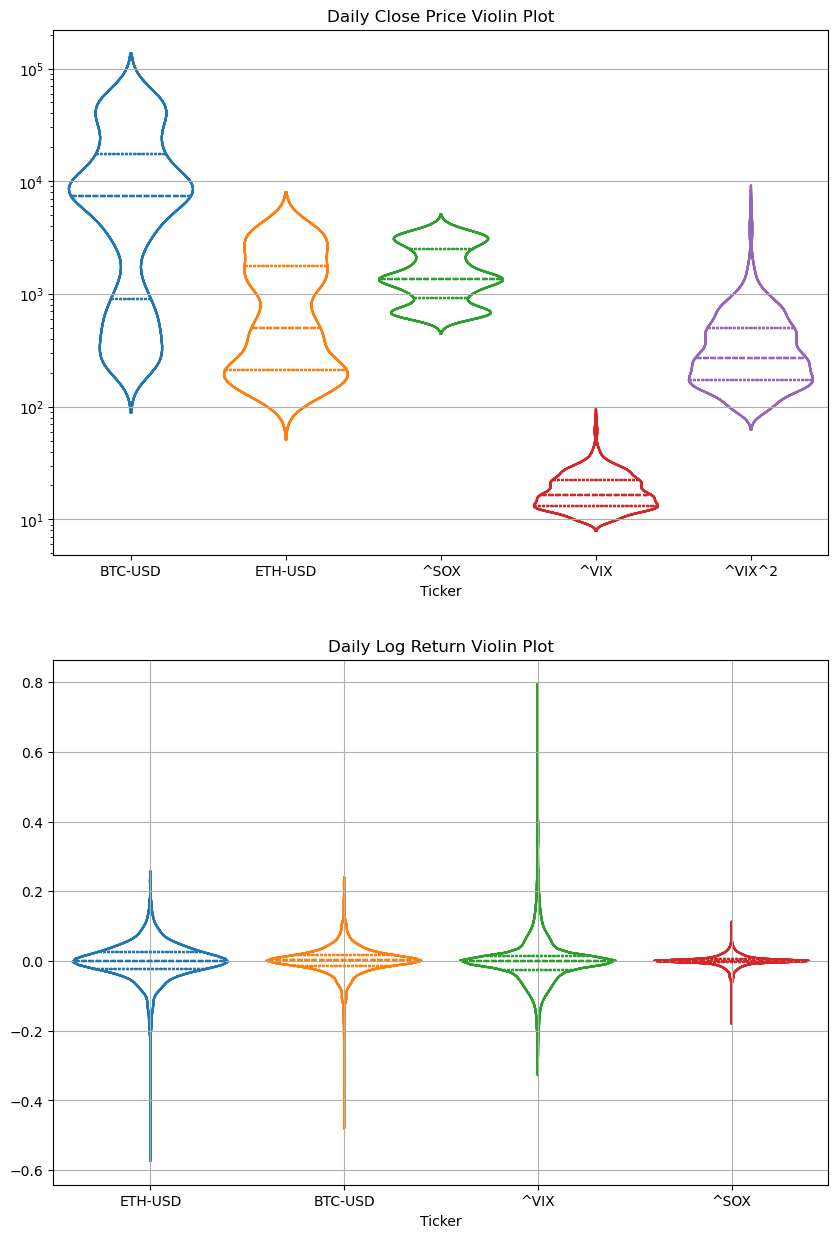

In [81]:
# Ploting voline plot for Close Price, Log Return using seaborn
# each voline
fig, ax = plt.subplots(2, 1, figsize=(10, 15))
for i in range(2):
    for symbol in symbol_list:
        sns.violinplot(data=data['Close'], ax=ax[0], inner='quartile', fill=False, log_scale=True)
        sns.violinplot(data=data['Log_Return'], ax=ax[1], inner='quartile', fill=False)
    ax[i].grid()
    ax[i].set_title(['Daily Close Price Violin Plot', 'Daily Log Return Violin Plot'][i])   
plt.show()

In [97]:
#drop columns under 'Realized_Volatility'
# data.drop(columns=['Realized_Volatility'], inplace=True)
# Add new set of columns under 'Realized_Volatility' which is the rolling standard deviation of the 'Log_Return' column
window_list = [7, 14, 21]
def add_realized_volatility(data, window_list):
    for window in window_list:
        data['Realized_Volatility', '^SOX_'+str(window)] = data['Log_Return']['^SOX'].rolling(window=window).std()
    return data

data = add_realized_volatility(data, window_list)
data[['Log_Return', 'Realized_Volatility']].head(25)

Price      Log_Return                               Realized_Volatility  \
Ticker        ETH-USD   BTC-USD      ^VIX      ^SOX              ^SOX_7   
Date                                                                      
2015-01-01        NaN       NaN       NaN       NaN                 NaN   
2015-01-02        NaN  0.002489       NaN       NaN                 NaN   
2015-01-03        NaN -0.114028  0.000000  0.000000                 NaN   
2015-01-04        NaN -0.061959  0.000000  0.000000                 NaN   
2015-01-05        NaN  0.038169  0.113088 -0.019320                 NaN   
2015-01-06        NaN  0.041796  0.058496 -0.022156                 NaN   
2015-01-07        NaN  0.028073 -0.089597  0.009727                 NaN   
2015-01-08        NaN -0.038046 -0.126822  0.028715                 NaN   
2015-01-09        NaN  0.024607  0.031252  0.001270            0.017246   
2015-01-10        NaN -0.055258  0.000000  0.000000            0.017246   
2015-01-11        NaN -0.033812  0.000000  0.000000            0.017246   
2015-01-12        NaN  0.008008  0.110476 -0.020187            0.017408   
2015-01-13        NaN -0.170306  0.047818 -0.009332            0.015278   
2015-01-14        NaN -0.237558  0.043775 -0.005922            0.015009   
2015-01-15        NaN  0.164002  0.041492 -0.007799            0.007533   
2015-01-16        NaN -0.008360 -0.066476  0.011133            0.009723   
2015-01-17        NaN -0.043394  0.000000  0.000000            0.009723   
2015-01-18        NaN  0.054110  0.000000  0.000000            0.009723   
2015-01-19        NaN  0.021271  0.000000  0.000000            0.006912   
2015-01-20        NaN -0.016641 -0.051922  0.010057            0.007223   
2015-01-21        NaN  0.071146 -0.053704  0.011255            0.007369   
2015-01-22        NaN  0.028283 -0.139232  0.006350            0.005433   
2015-01-23        NaN -0.002260  0.015729 -0.002847            0.005602   
2015-01-24        NaN  0.062293  0.000000  0.000000            0.005602   
2015-01-25        NaN  0.023412  0.000000  0.000000            0.005602   

Price                           
Ticker       ^SOX_14   ^SOX_21  
Date                            
2015-01-01       NaN       NaN  
2015-01-02       NaN       NaN  
2015-01-03       NaN       NaN  
2015-01-04       NaN       NaN  
2015-01-05       NaN       NaN  
2015-01-06       NaN       NaN  
2015-01-07       NaN       NaN  
2015-01-08       NaN       NaN  
2015-01-09       NaN       NaN  
2015-01-10       NaN       NaN  
2015-01-11       NaN       NaN  
2015-01-12       NaN       NaN  
2015-01-13       NaN       NaN  
2015-01-14       NaN       NaN  
2015-01-15       NaN       NaN  
2015-01-16  0.013637       NaN  
2015-01-17  0.013637       NaN  
2015-01-18  0.013637       NaN  
2015-01-19  0.012743       NaN  
2015-01-20  0.011483       NaN  
2015-01-21  0.011576       NaN  
2015-01-22  0.008698       NaN  
2015-01-23  0.008713  0.011772  
2015-01-24  0.008713  0.011772  
2015-01-25  0.008713  0.011772

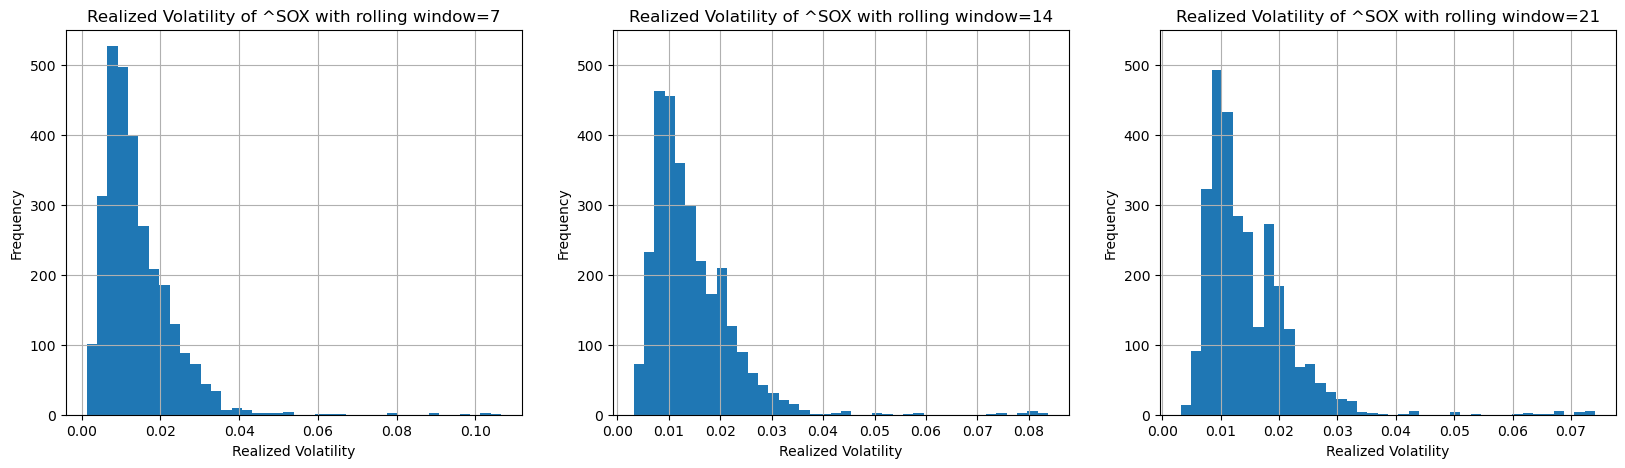

In [112]:
# Plotting the Realized Volatility of '^SOX' with different rolling window with bar plot
# x-axis: Realized Volatility of '^SOX', y-axis: number of days
fig, ax = plt.subplots(1, len(window_list), figsize=(20, 5))
for idx in range(len(window_list)):
    data['Realized_Volatility']['^SOX_'+str(window_list[idx])].plot.hist(ax=ax[idx], bins=40)
    ax[idx].set_xlabel('Realized Volatility')
    ax[idx].set_ylim(0, 550)
    ax[idx].grid()
    ax[idx].set_title('Realized Volatility of ^SOX with rolling window=' + str(window_list[idx]))
plt.show()

In [119]:
data['Log_Return']['^SOX'].dropna()

Date
2015-01-03    0.000000
2015-01-04    0.000000
2015-01-05   -0.019320
2015-01-06   -0.022156
2015-01-07    0.009727
                ...   
2022-12-26    0.000000
2022-12-27   -0.018036
2022-12-28   -0.014839
2022-12-29    0.032662
2022-12-30   -0.001121
Freq: D, Name: ^SOX, Length: 2919, dtype: float64

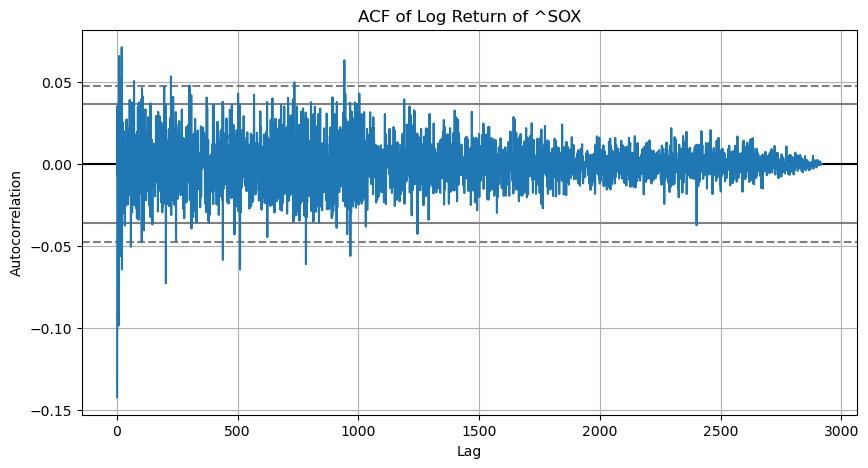

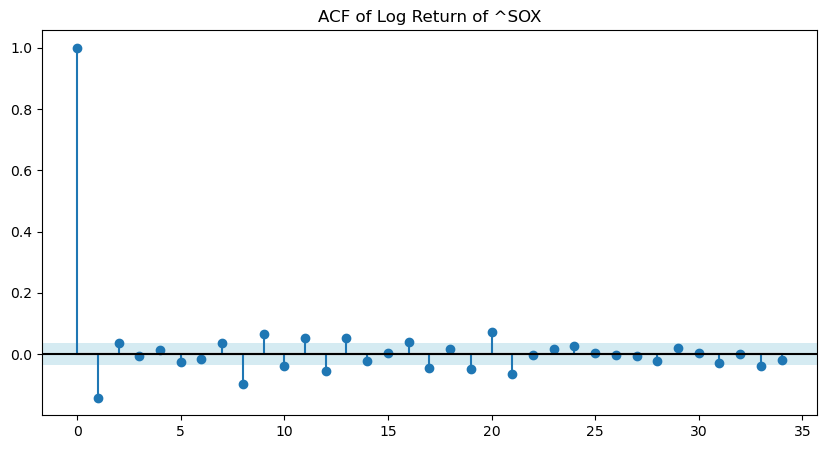

In [152]:
# Plotting the Auto Correlation Function (ACF) of 'Log_Return' of '^SOX' with different lag
# x-axis: lag, y-axis: ACF
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
pd.plotting.autocorrelation_plot(data['Log_Return']['^SOX'].dropna(), ax=ax)
# ax.set_xlim([0, 100])
ax.set_title('ACF of Log Return of ^SOX')
plt.show()

# use stick plot to plot the ACF
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.stem(acf(data['Log_Return']['^SOX'].dropna()))
# color the 2 std value background with light blue
ax.axhspan(-1.96/np.sqrt(len(data)), 1.96/np.sqrt(len(data)), facecolor='lightblue', alpha=0.5)
ax.axhline(0, color='black')
ax.set_title('ACF of Log Return of ^SOX')
plt.show()

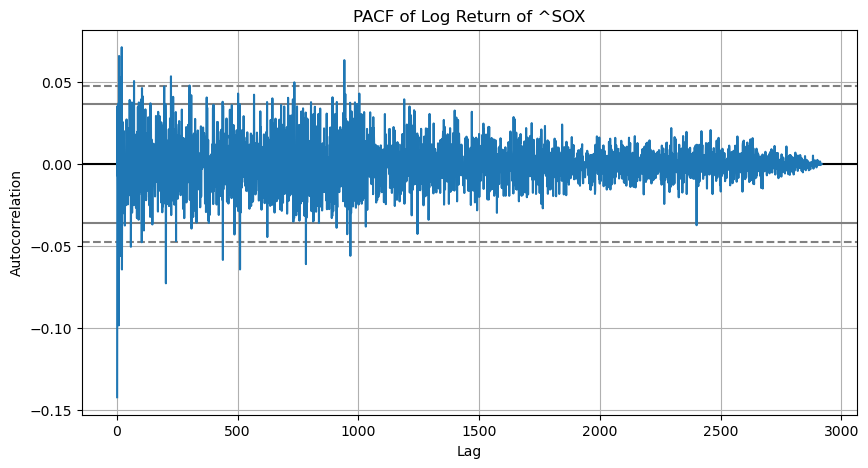

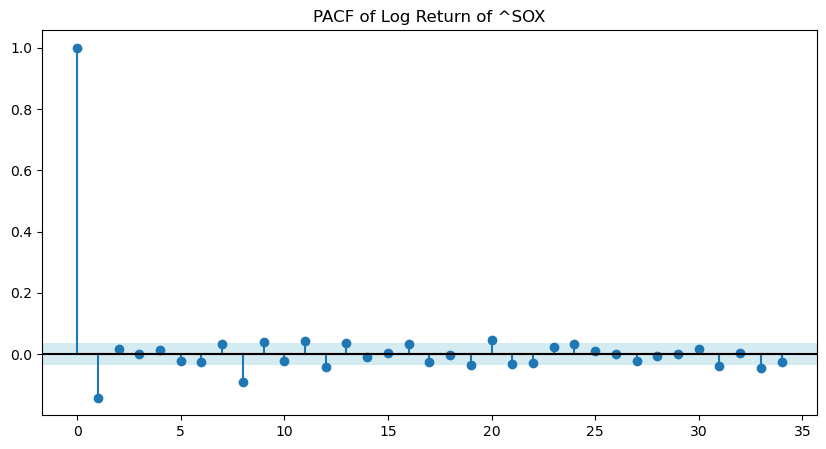

In [154]:
# Plotting the partial autocorrelation function (PACF) of 'Log_Return' of '^SOX' with different lag
# x-axis: lag, y-axis: PACF
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
pd.plotting.autocorrelation_plot(data['Log_Return']['^SOX'].dropna(), ax=ax)
# ax.set_xlim([0, 100])
ax.set_title('PACF of Log Return of ^SOX')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.stem(pacf(data['Log_Return']['^SOX'].dropna()))
# color the 2 std value background with light blue
ax.axhspan(-1.96/np.sqrt(len(data)), 1.96/np.sqrt(len(data)), facecolor='lightblue', alpha=0.5)
ax.axhline(0, color='black')
ax.set_title('PACF of Log Return of ^SOX')
plt.show()

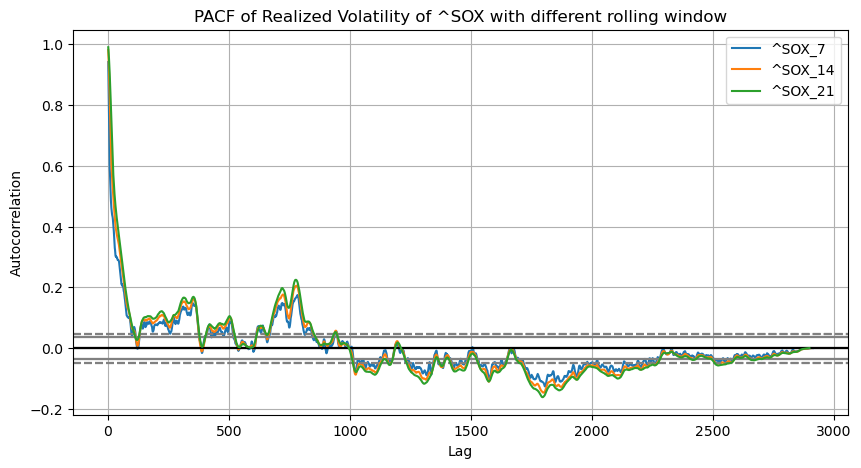

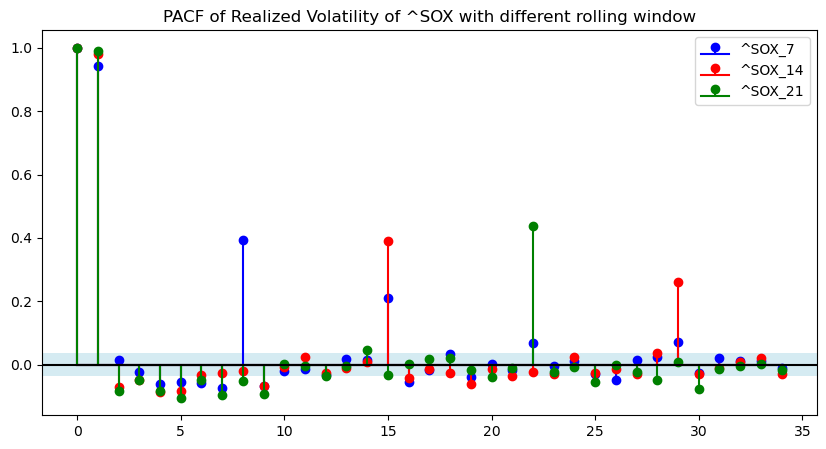

In [170]:
# Plotting the partial autocorrelation function (PACF) of 'Realized_Volatility' of '^SOX' with different lag
# x-axis: lag, y-axis: PACF
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
pd.plotting.autocorrelation_plot(data['Realized_Volatility']['^SOX_7'].dropna(), ax=ax, label='^SOX_7')
pd.plotting.autocorrelation_plot(data['Realized_Volatility']['^SOX_14'].dropna(), ax=ax, label='^SOX_14')
pd.plotting.autocorrelation_plot(data['Realized_Volatility']['^SOX_21'].dropna(), ax=ax, label='^SOX_21')
ax.set_title('PACF of Realized Volatility of ^SOX with different rolling window')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.stem(pacf(data['Realized_Volatility']['^SOX_7'].dropna()), linefmt='b-', markerfmt='bo', basefmt='b-')
ax.stem(pacf(data['Realized_Volatility']['^SOX_14'].dropna()), linefmt='r-', markerfmt='ro', basefmt='r-')
ax.stem(pacf(data['Realized_Volatility']['^SOX_21'].dropna()), linefmt='g-', markerfmt='go', basefmt='g-')
ax.legend(['^SOX_7', '^SOX_14', '^SOX_21'])
# color the 2 std value background with light blue
ax.axhspan(-1.96/np.sqrt(len(data)), 1.96/np.sqrt(len(data)), facecolor='lightblue', alpha=0.5)
ax.axhline(0, color='black')
ax.set_title('PACF of Realized Volatility of ^SOX with different rolling window')
plt.show()

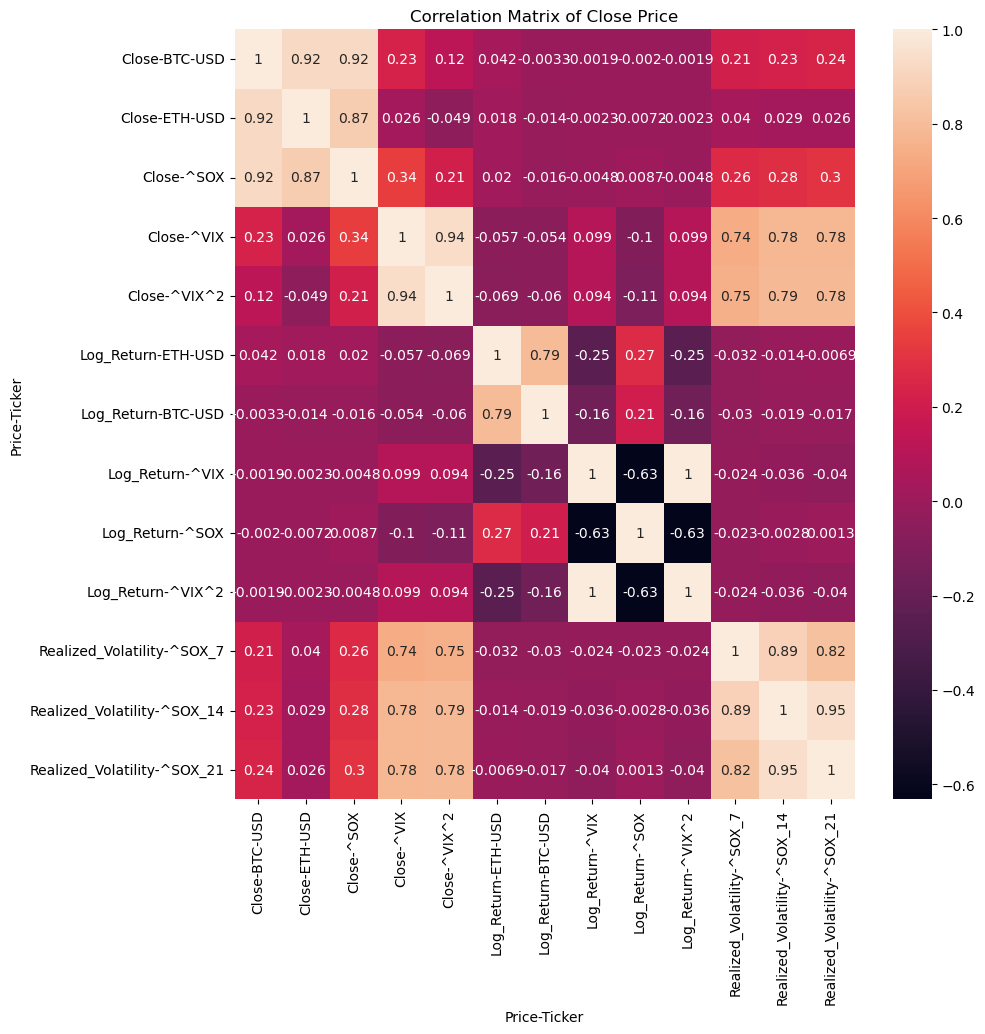

In [168]:
# Plotting Heatmap of the correlation matrix of 'Close', 'Log_Return', 'Realized_Volatility'
# x-axis: symbol, y-axis: symbol, value: correlation
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(data[['Close', 'Log_Return', 'Realized_Volatility']].corr(), annot=True, ax=ax)
ax.set_title('Correlation Matrix of Close Price')
plt.show()

In [172]:
# Add new columns under 'Lagged_Return' which is the lagged 'Log_Return' of '^SOX' column with 3 lag
lag_list = [1, 2, 3]
def add_lagged_return(data, lag_list):
    for lag in lag_list:
        data['Lagged_Return', '^SOX_'+str(lag)] = data['Log_Return']['^SOX'].shift(lag)
    return data

data = add_lagged_return(data, lag_list)

# Add new columns under 'Lagged_Realized_Volatility' which is the lagged 'Realized_Volatility' of '^SOX' column with 3 lag
def add_lagged_realized_volatility(data, lag_list):
    for lag in lag_list:
        data['Lagged_Realized_Volatility', '^SOX_'+str(lag)] = data['Realized_Volatility']['^SOX_7'].shift(lag)
    return data

data = add_lagged_realized_volatility(data, lag_list)

data[['Log_Return', 'Lagged_Return', 'Realized_Volatility', 'Lagged_Realized_Volatility']].head(25)

Price      Log_Return                                         Lagged_Return  \
Ticker        ETH-USD   BTC-USD      ^VIX      ^SOX    ^VIX^2        ^SOX_1   
Date                                                                          
2015-01-01        NaN       NaN       NaN       NaN       NaN           NaN   
2015-01-02        NaN  0.002489       NaN       NaN       NaN           NaN   
2015-01-03        NaN -0.114028  0.000000  0.000000  0.000000           NaN   
2015-01-04        NaN -0.061959  0.000000  0.000000  0.000000      0.000000   
2015-01-05        NaN  0.038169  0.113088 -0.019320  0.226175      0.000000   
2015-01-06        NaN  0.041796  0.058496 -0.022156  0.116992     -0.019320   
2015-01-07        NaN  0.028073 -0.089597  0.009727 -0.179195     -0.022156   
2015-01-08        NaN -0.038046 -0.126822  0.028715 -0.253643      0.009727   
2015-01-09        NaN  0.024607  0.031252  0.001270  0.062505      0.028715   
2015-01-10        NaN -0.055258  0.000000  0.000000  0.000000      0.001270   
2015-01-11        NaN -0.033812  0.000000  0.000000  0.000000      0.000000   
2015-01-12        NaN  0.008008  0.110476 -0.020187  0.220951      0.000000   
2015-01-13        NaN -0.170306  0.047818 -0.009332  0.095636     -0.020187   
2015-01-14        NaN -0.237558  0.043775 -0.005922  0.087550     -0.009332   
2015-01-15        NaN  0.164002  0.041492 -0.007799  0.082984     -0.005922   
2015-01-16        NaN -0.008360 -0.066476  0.011133 -0.132951     -0.007799   
2015-01-17        NaN -0.043394  0.000000  0.000000  0.000000      0.011133   
2015-01-18        NaN  0.054110  0.000000  0.000000  0.000000      0.000000   
2015-01-19        NaN  0.021271  0.000000  0.000000  0.000000      0.000000   
2015-01-20        NaN -0.016641 -0.051922  0.010057 -0.103843      0.000000   
2015-01-21        NaN  0.071146 -0.053704  0.011255 -0.107408      0.010057   
2015-01-22        NaN  0.028283 -0.139232  0.006350 -0.278463      0.011255   
2015-01-23        NaN -0.002260  0.015729 -0.002847  0.031459      0.006350   
2015-01-24        NaN  0.062293  0.000000  0.000000  0.000000     -0.002847   
2015-01-25        NaN  0.023412  0.000000  0.000000  0.000000      0.000000   

Price                          Realized_Volatility                      \
Ticker        ^SOX_2    ^SOX_3              ^SOX_7   ^SOX_14   ^SOX_21   
Date                                                                     
2015-01-01       NaN       NaN                 NaN       NaN       NaN   
2015-01-02       NaN       NaN                 NaN       NaN       NaN   
2015-01-03       NaN       NaN                 NaN       NaN       NaN   
2015-01-04       NaN       NaN                 NaN       NaN       NaN   
2015-01-05  0.000000       NaN                 NaN       NaN       NaN   
2015-01-06  0.000000  0.000000                 NaN       NaN       NaN   
2015-01-07 -0.019320  0.000000                 NaN       NaN       NaN   
2015-01-08 -0.022156 -0.019320                 NaN       NaN       NaN   
2015-01-09  0.009727 -0.022156            0.017246       NaN       NaN   
2015-01-10  0.028715  0.009727            0.017246       NaN       NaN   
2015-01-11  0.001270  0.028715            0.017246       NaN       NaN   
2015-01-12  0.000000  0.001270            0.017408       NaN       NaN   
2015-01-13  0.000000  0.000000            0.015278       NaN       NaN   
2015-01-14 -0.020187  0.000000            0.015009       NaN       NaN   
2015-01-15 -0.009332 -0.020187            0.007533       NaN       NaN   
2015-01-16 -0.005922 -0.009332            0.009723  0.013637       NaN   
2015-01-17 -0.007799 -0.005922            0.009723  0.013637       NaN   
2015-01-18  0.011133 -0.007799            0.009723  0.013637       NaN   
2015-01-19  0.000000  0.011133            0.006912  0.012743       NaN   
2015-01-20  0.000000  0.000000            0.007223  0.011483       NaN   
2015-01-21  0.000000  0.000000            0.007369  0.011576       NaN   
2015-01-22 

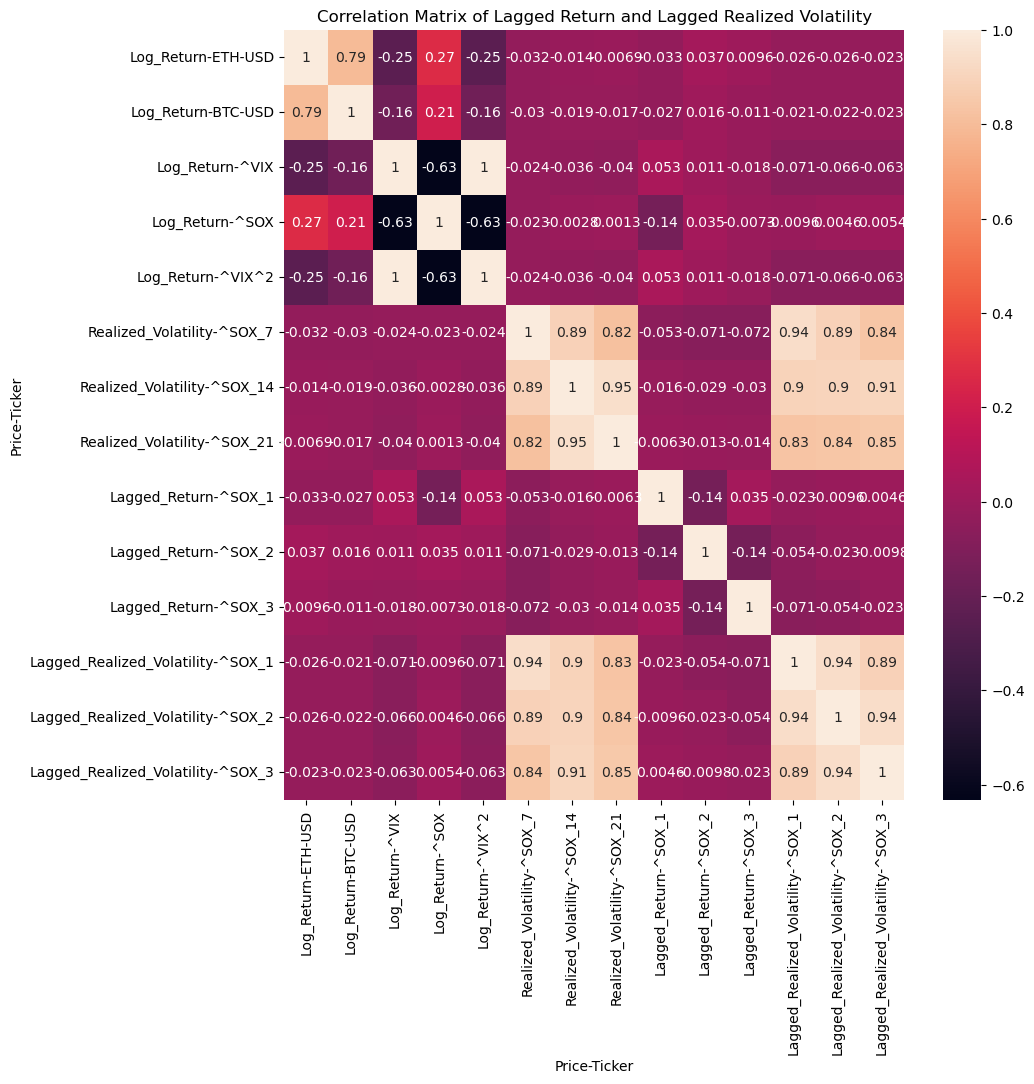

In [173]:
# Plotting Heatmap of the correlation matrix of 'Log_Return', 'Realized_Volatility', 'Lagged_Return', 'Lagged_Realized_Volatility'
# x-axis: symbol, y-axis: symbol, value: correlation
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(data[['Log_Return', 'Realized_Volatility', 'Lagged_Return', 'Lagged_Realized_Volatility']].corr(), annot=True, ax=ax)
ax.set_title('Correlation Matrix of Lagged Return and Lagged Realized Volatility')
plt.show()

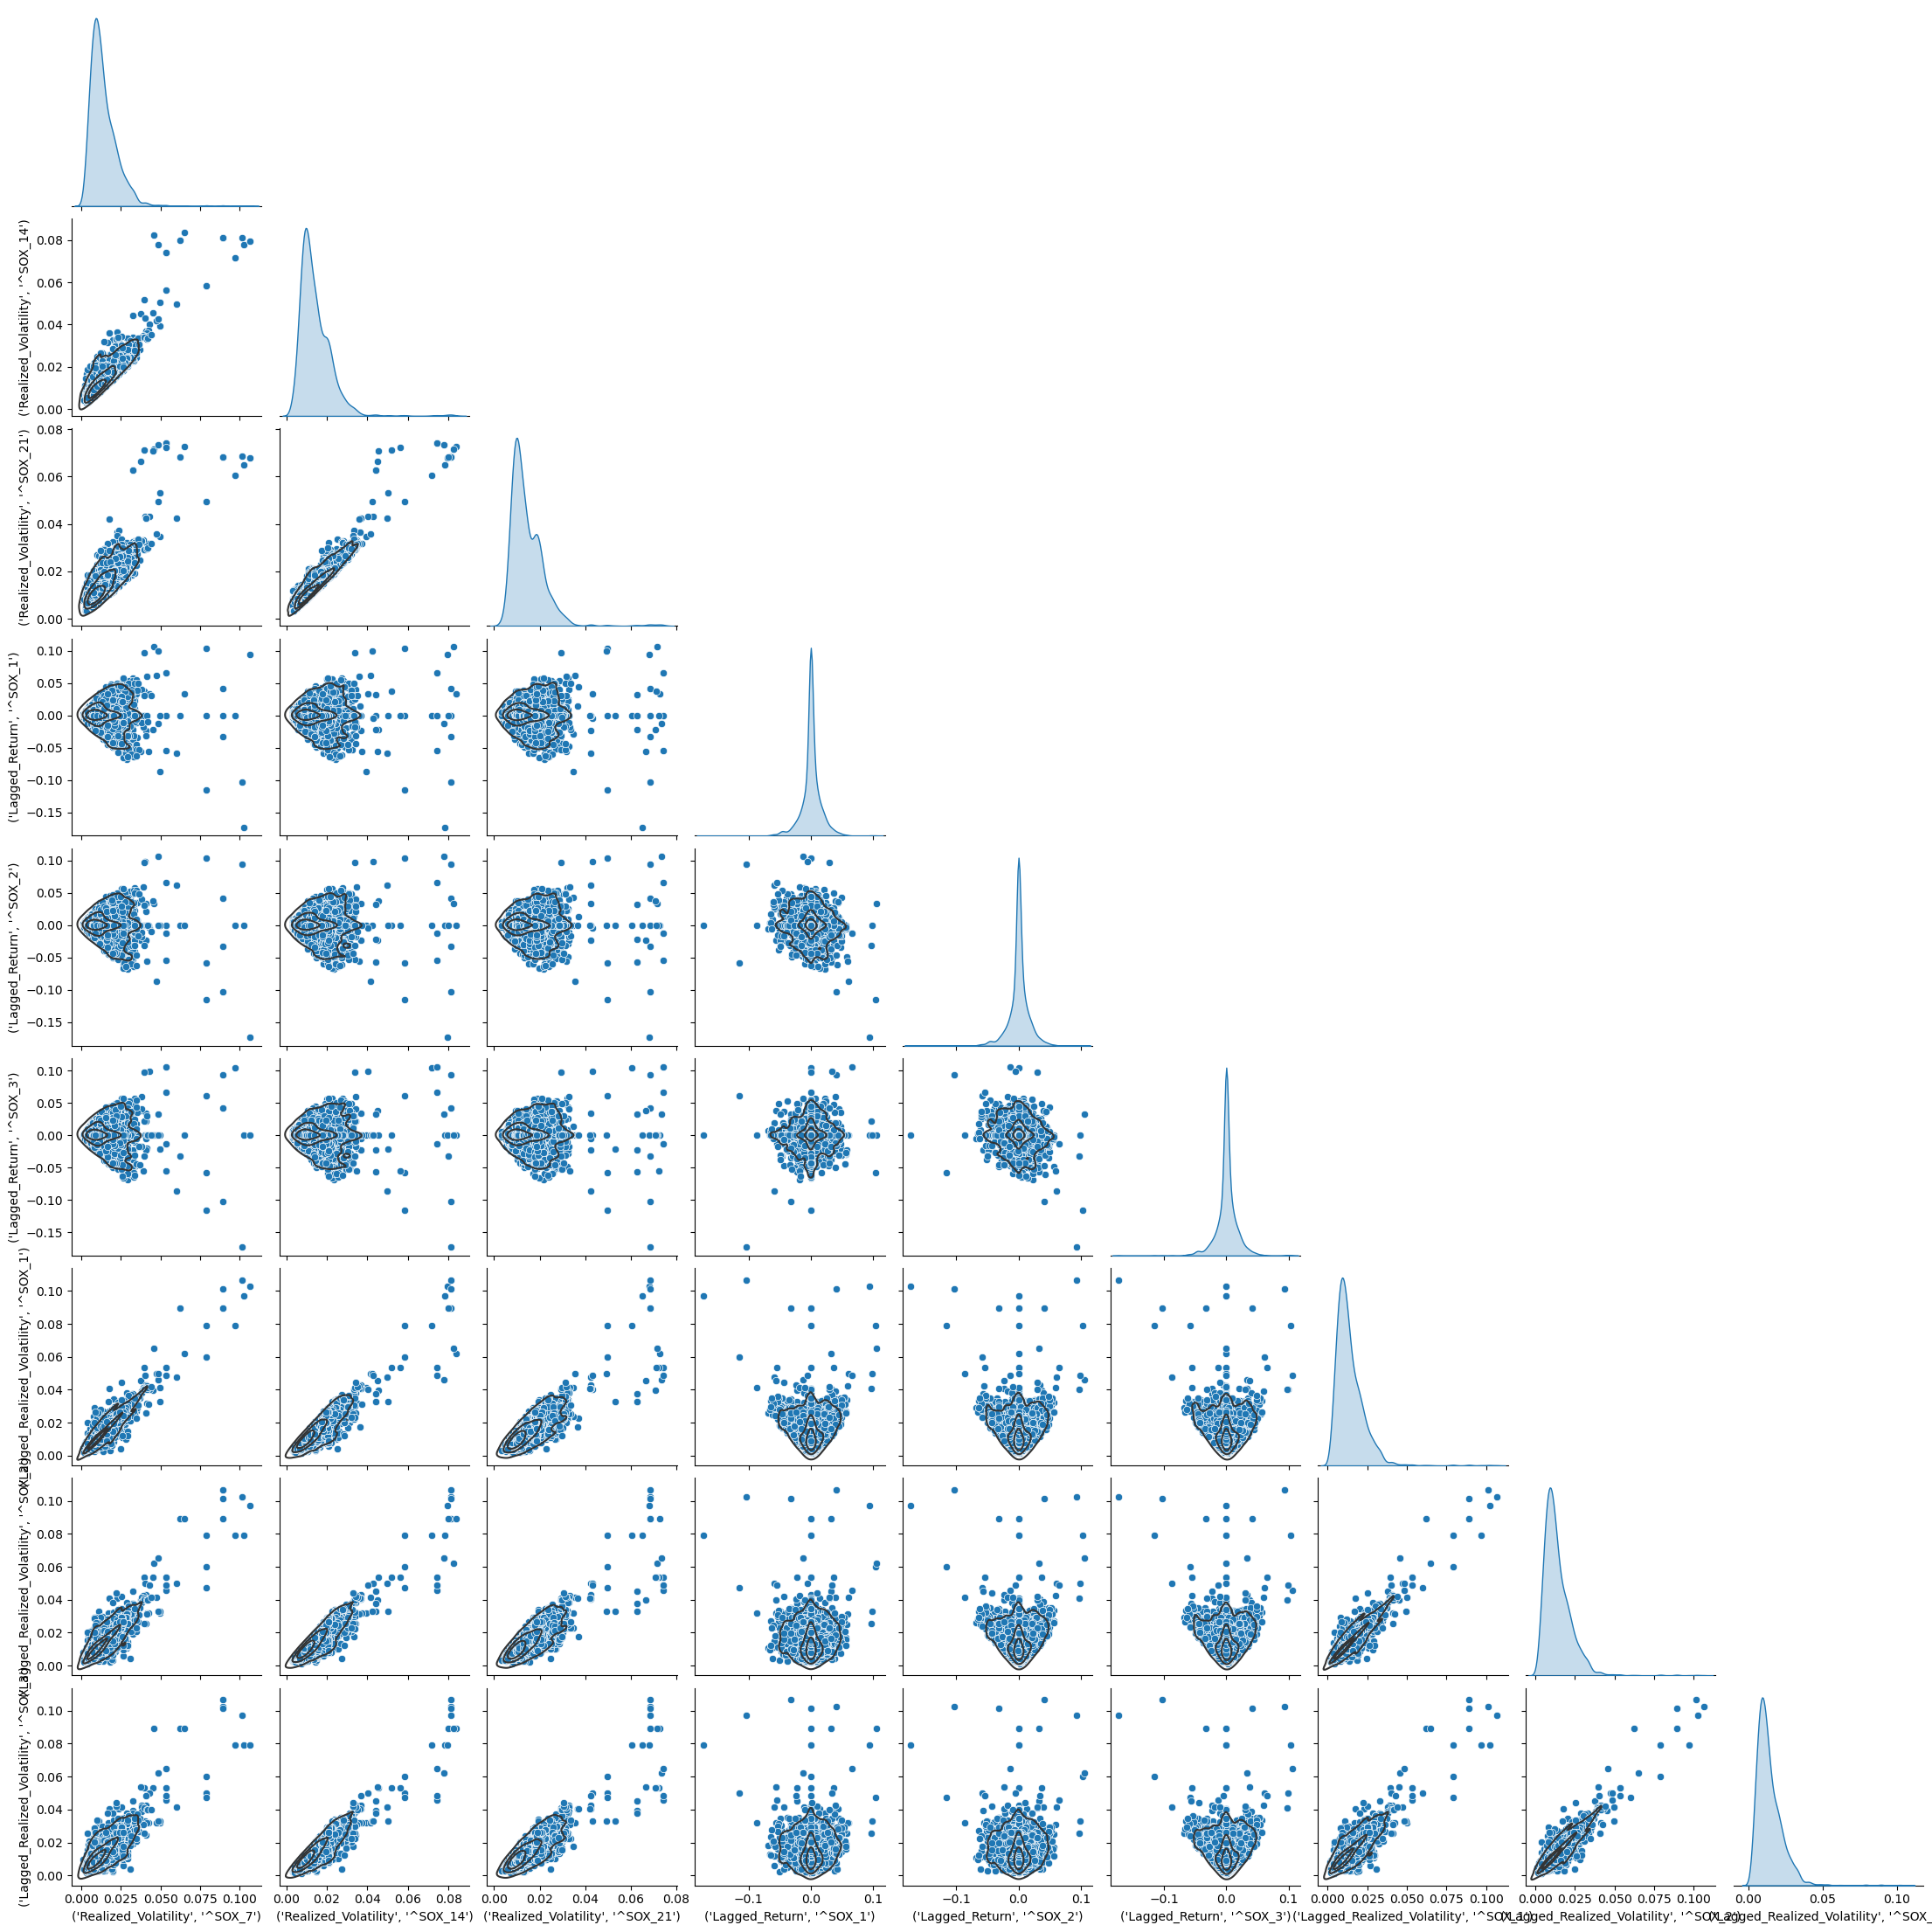

In [177]:
# Plotting the correlogram of 'Realized_Volatility', 'Lagged_Return', 'Lagged_Realized_Volatility'
# x-axis: lag, y-axis: correlation
# only plot the lower triangle of the correlogram with sns
g = sns.pairplot(data[['Realized_Volatility', 'Lagged_Return', 'Lagged_Realized_Volatility']], corner=True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

plt.show()